# Discrete Fourier Transform (DFT)

Discrete Fourier Transform (DFT):
$$ F_m = \sum_{n=0}^{N-1} f_n e^{-2\pi jmn/ N} \quad ; (m=0,1,2,3,...,N-1) $$
Discrete Inverse Fourier Transform (DIFT):
$$ f_n = \sum_{m=0}^{N-1} F_m e^{2\pi jmn/ N} \quad ; (n=0,1,2,3,...,N-1)$$

**Algorithm:**
1. Get the value of $N$.
2. Get $f_n$ for $n = 0, 1, 2, ..., N-1$.
3. for $m = 0, 1, 2, ..., N-1: \quad F_m \leftarrow 0$
4. for m in range(N): for n in range(N): $\quad F_m \leftarrow F_m + f_n e^{-2\pi j mn/N} $

In [1]:
import numpy as np

Defining **`dft`** function for both DFT and DIFT:

In [2]:
def dft(ft, isg):
    N = len(ft)
    Fs = []
    for m in range(N):
        Fk = 0
        for n in range(N):
            Fk += ft[n] * np.exp(-isg*2*np.pi*1j*m*n/N)
        if isg == 1:
            Fs.append(Fk)
        elif isg == -1:
            Fs.append(Fk/N)
    return Fs

Defining **`cntdft`** function for getting centered or two-sided transform instead of one-sided transform:

In [3]:
def cntdft(ft, isg):
    N = len(ft)
    a = (N-1)/2
    exft = [ft[i]*np.exp(2*np.pi*1j*a*i/N) for i in range(N)] # pre-transform
    Fs = dft(exft, isg)
    Fs = [Fs[i]*np.exp(2*np.pi*1j*a*(i-a)/N) for i in range(N)] # post-transform
    return Fs

Defining **`fourspc`** function for Fourier space co-ordinates:

$$\delta x \delta k = \frac{2\pi}{N} \,; \quad k_{mx} = \left(1-\frac{1}{N} \right)\frac{\pi}{\delta x} $$

In [4]:
def fourspc(x):
    N = len(x)
    dx = x[1]-x[0]
    dk = 2*np.pi/(N*dx)
    kmx = (1 -1/N)*np.pi/dx
    k = [-kmx + i*dk for i in range(N)]
    return k

## Example

### Example 1
$$ U(t) = 1+t \quad ;(-1 \leq t < 0) $$
$$ = 1-t \quad ; (0 \leq t < 1) $$
$$ =0 \quad otherwise $$

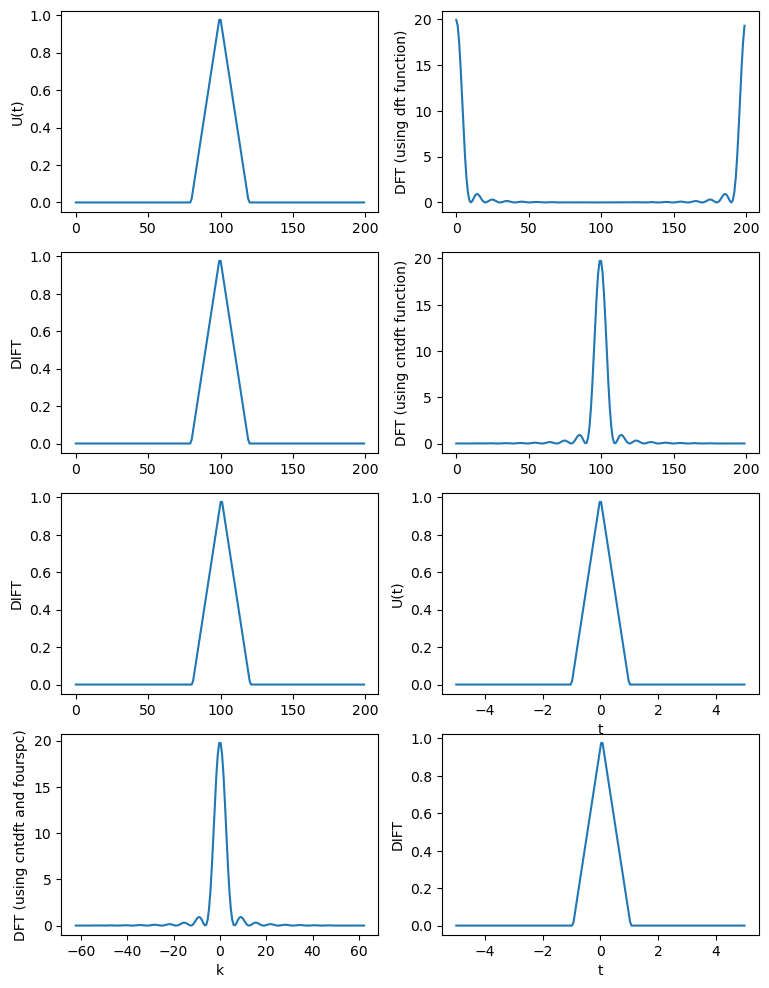

In [5]:
import matplotlib.pyplot as plt

def u(t):
    if -1<=t<0:
        ut = 1+t
    elif 0<=t<1:
        ut = 1-t
    else:
        ut = 0
    return ut

tmn, tmx = -5, 5  # time bounds
N = 200    # no. of samples
dt = (tmx-tmn)/(N-1)

t = [tmn + i*dt for i in range(N)] # time samples
k = fourspc(t)
ut = [u(tt) for tt in t] # discrete signal

Fs1 = dft(ut, 1) # DFT
IFs1 = dft(Fs1, -1) # DIFT
Fs2 = cntdft(ut, 1)
IFs2 = cntdft(Fs2, -1)

plt.figure(figsize=(9,12))
plt.subplot(4,2,1)
plt.plot(ut)
plt.ylabel('U(t)')

plt.subplot(4,2,2)
plt.plot(np.abs(Fs1))
plt.ylabel('DFT (using dft function)')
plt.subplot(4,2,3)
plt.plot(np.abs(IFs1))
plt.ylabel('DIFT')

plt.subplot(4,2,4)
plt.plot(np.abs(Fs2))
plt.ylabel('DFT (using cntdft function)')
plt.subplot(4,2,5)
plt.plot(np.abs(IFs2))
plt.ylabel('DIFT')

plt.subplot(4,2,6)
plt.plot(t, ut)
plt.xlabel('t')
plt.ylabel('U(t)')
plt.subplot(4,2,7)
plt.plot(k, np.abs(Fs2))
plt.xlabel('k')
plt.ylabel('DFT (using cntdft and fourspc)')
plt.subplot(4,2,8)
plt.plot(t, np.abs(IFs2))
plt.xlabel('t')
plt.ylabel('DIFT')
plt.show()

## Example 2
Rectangular function:
$$ f(t) = 1 \quad ; (-\pi \leq t \leq \pi) $$
$$ = 0 \quad otherwise $$

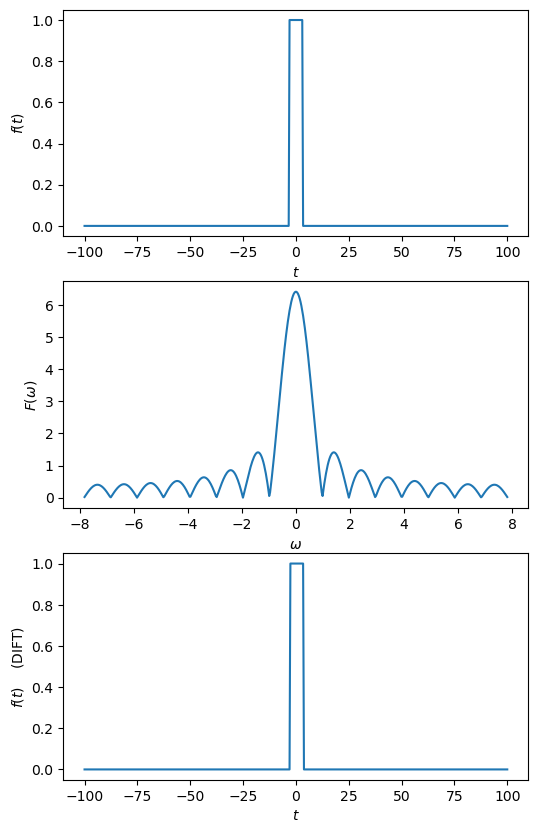

In [6]:
def f(t):
    if -np.pi<=t<=np.pi:
        ft = 1
    else:
        ft = 0
    return ft

N = 500
tmn, tmx = -100, 100
dt = (tmx-tmn)/(N-1)
t = [tmn+i*dt for i in range (N)]
k = fourspc(t)
ft = [f(tt) for tt in t]
Fs = cntdft(ft, 1)
IFs = cntdft(Fs, -1)

plt.figure(figsize=(6, 10))
plt.subplot(3,1,1)
plt.plot(t, ft)
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.subplot(3,1,2)
plt.plot(k, np.abs(Fs)*dt)
plt.xlabel('$\omega$')
plt.ylabel('$F(\omega)$')
plt.subplot(3,1,3)
plt.plot(t, np.abs(IFs))
plt.xlabel('$t$')
plt.ylabel('$f(t) \quad$ (DIFT)')
plt.show()

### Example 3
Fourier transform of a signal which is superpositions of a number of signals with different frequencies and amplitudes.

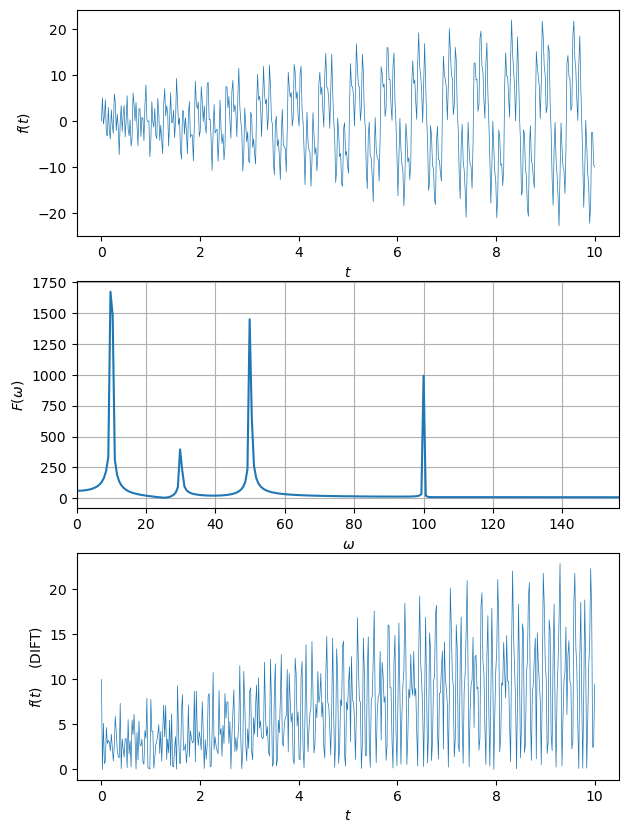

In [7]:
def f(t):
    freqs = [10, 30, 50, 100] # frequencies
    amps = [t**2*np.exp(-t/5), 2, 3*t**0.5, 4]  # amplitudes
    phis = [0, 0, 0, 0]  # initial phases
    ft = 0
    for i in range(len(freqs)):
        ft += amps[i]*np.sin(freqs[i]*t +phis[i])
    return ft

N = 500
tmn, tmx = 0, 10
dt = (tmx-tmn)/(N-1)
t = [tmn+i*dt for i in range(N)]
w = fourspc(t)
ft = [f(tt) for tt in t]
Fw = cntdft(ft, 1)
ift = cntdft(Fw, -1)

plt.figure(figsize=(7, 10))
plt.subplot(311)
plt.plot(t, ft, lw=0.5)
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.subplot(312)
plt.plot(w, np.abs(Fw))
plt.xlim(0, np.max(w))
plt.xlabel('$\omega$')
plt.ylabel('$F(\omega)$')
plt.grid()
plt.subplot(313)
plt.plot(t, np.abs(ift), lw=0.5)
plt.xlabel('$t$')
plt.ylabel('$f(t) \quad$ (DIFT)')
plt.show()

# Fast Fourier Transform (FFT)

In [8]:
import numpy as np

In [9]:
def fft2(ft, isg):
    N = len(ft)
    if N==1:
        F = ft # dft is length 1
    else:
        # divide the dft into 2 using radix-2 Cooley-Tukey
        Am = fft2(ft[::2], isg)
        Bm = fft2(ft[1::2], isg)
        # combine with appropriate weights
        m = np.arange(N/2)
        W = np.exp(-isg*2*np.pi*1j*m/N)
        F = np.concatenate([Am + W*Bm, Am - W*Bm])
    return F    

In [10]:
def fft(ft, isg):
    N = len(ft)
    if isg==1:
        return fft2(ft, isg)
    elif isg==-1:
        return fft2(ft, isg)/N

In [11]:
def cntfft(ft, isg):
    N = len(ft)
    a = (N-1)/2
    exft = [ft[i]*np.exp(2*np.pi*1j*a*i/N) for i in range(N)] # pre-transform
    Fs = fft(exft, isg)
    Fs = [Fs[i]*np.exp(2*np.pi*1j*a*(i-a)/N) for i in range(N)] # post-transform
    return Fs

### Example 1:
Real part of Gaussian function:
$$ f(x) = e^{-\dfrac{x^2}{\sigma^2}} \cos \omega_0x $$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


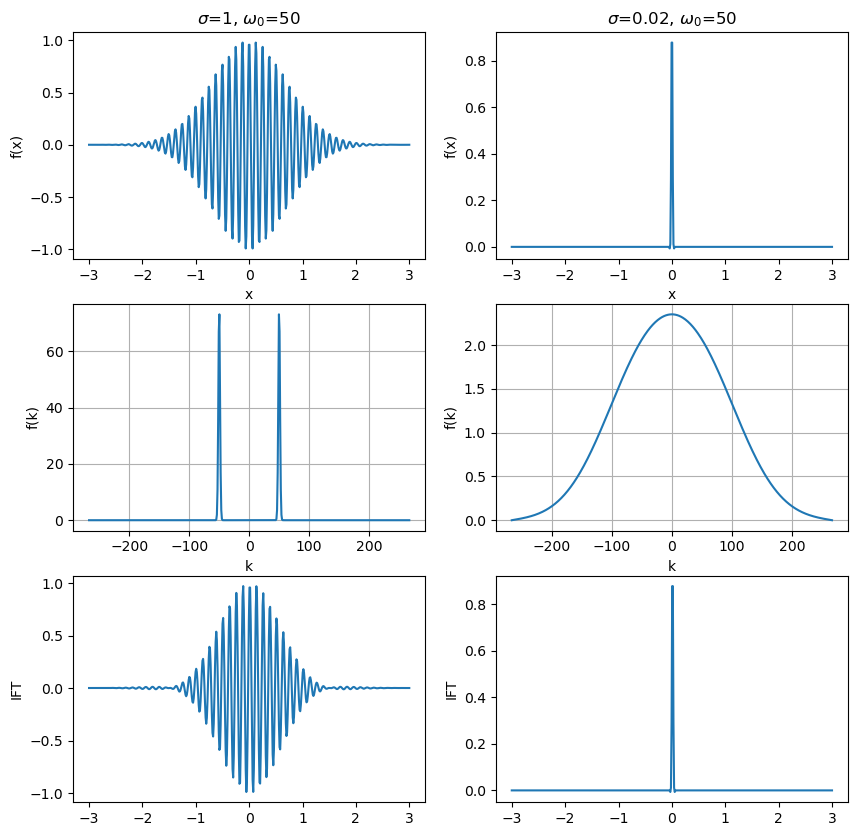

In [12]:
def f(pr, x):
    sig, w0 = pr
    return np.exp(-x**2/sig**2)*np.cos(w0*x)

N = 512  # N should be in the form 2**n
xmn, xmx = -3, 3
dt = (xmx-xmn)/(N-1)
x = [xmn+i*dt for i in range(N)]
k = fourspc(x)

sig1, w01 = 1, 50  # parameters
pr1 = [sig1, w01]
fx1 = [f(pr1, xx) for xx in x]
fk1 = cntfft(fx1, 1)
ifx1 = cntfft(fk1, -1)
sig2, w02 = 0.02, 50  # parameters
pr2 = [sig2, w02]
fx2 = [f(pr2, xx) for xx in x]
fk2 = cntfft(fx2, 1)
ifx2 = cntfft(fk2, -1)

plt.figure(figsize=(10, 10))
plt.subplot(321)
plt.title(f'$\sigma$={sig1}, $\omega_0$={w01}')
plt.plot(x, fx1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.subplot(323)
plt.plot(k, np.abs(fk1))
plt.xlabel('k')
plt.ylabel('f(k)')
plt.grid()
plt.subplot(325)
plt.plot(x, ifx1)
plt.ylabel('IFT')

plt.subplot(322)
plt.title(f'$\sigma$={sig2}, $\omega_0$={w02}')
plt.plot(x, fx2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.subplot(324)
plt.plot(k, np.abs(fk2))
plt.xlabel('k')
plt.ylabel('f(k)')
plt.grid()
plt.subplot(326)
plt.plot(x, ifx2)
plt.ylabel('IFT')
plt.show()